In [ ]:
!pip list

In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())


/device:GPU:0


**os is mainly used to navigate through the files**

In [ ]:
import tensorflow as tf
import os

In [ ]:
os.path.join('data','happy')
# os.listdir('data')

'data/happy'

In [ ]:
#avoid oom errors by setting  gpu memory consumption growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
folder_name='data1'
folder_path = os.path.join('.', folder_name)
os.makedirs(folder_path, exist_ok=True)

In [ ]:
import shutil

# Path to the file in Google Drive
file_path_in_drive = '/content/gdrive/My Drive/material/happy'
destination_folder_path = '/content/data2/happy'


# Copy the file to the current working directory in Colab
shutil.copytree(file_path_in_drive, destination_folder_path)

'/content/data2/happy'

In [ ]:

# Path to the file in Google Drive
file_path_in_drive = '/content/gdrive/My Drive/material/sad'
destination_folder_path = '/content/data2/sad'


# Copy the file to the current working directory in Colab
shutil.copytree(file_path_in_drive, destination_folder_path)

'/content/data2/sad'

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir='/content/data2'

In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
len(data_dir)

14

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))

['56f455011e0000b300705475.jpeg',
 'smile.woman_.jpg',
 'physed-happiness-facebookJumbo.jpg',
 'How-to-Be-Happy_1200x628-facebook.jpg',
 'happy-people-vector-839522.jpg',
 'crowd-of-happy-people-poster-vector-20970718.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'getty_494581822_130796.jpg',
 'happy-people-702x336.jpg',
 'maxresdefault.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 'happy-people-1024x768.jpeg',
 'happiness.jpg',
 'Happy-people.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 'GettyImages-565706549-949x534.jpg',
 '960x0.jpg',
 'compassion-900x387.jpg',
 'what-makes-people-happy1.jpg',
 'happinessa.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 'tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg',
 '1920px-face-smile.svg_.png.jpg',
 'Top-Secrets-of-How-to-be-Happy.jpg',
 'o-HAPPY-facebook.jpg',
 'what-m

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


Image not in ext list /content/data2/happy/56f455011e0000b300705475.jpeg
Image not in ext list /content/data2/happy/o-HAPPY-facebook.jpg
Image not in ext list /content/data2/happy/Happy20People.jpg
Image not in ext list /content/data2/happy/group-happy-people-isolated-over-600w-102307264.jpg
Image not in ext list /content/data2/happy/3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Image not in ext list /content/data2/happy/happy-people-having-fun-over-260nw-611293913.jpg
Image not in ext list /content/data2/happy/2560px-Happy_People.jpg
Image not in ext list /content/data2/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list /content/data2/sad/44861512-smiling-man-in-a-crowd-of-sad-people.jpg
Image not in ext list /content/data2/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list /content/data2/sad/14HRhniN7B7Fqx5GCoFpQ3A.jpeg
Image not in ext list /content/data2/sad/sad-people-group-therapy-session_23-21

In [ ]:
len(data_dir)

14

In [ ]:
data_dir

'/content/data2'

Load data


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data2')

Found 148 files belonging to 2 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

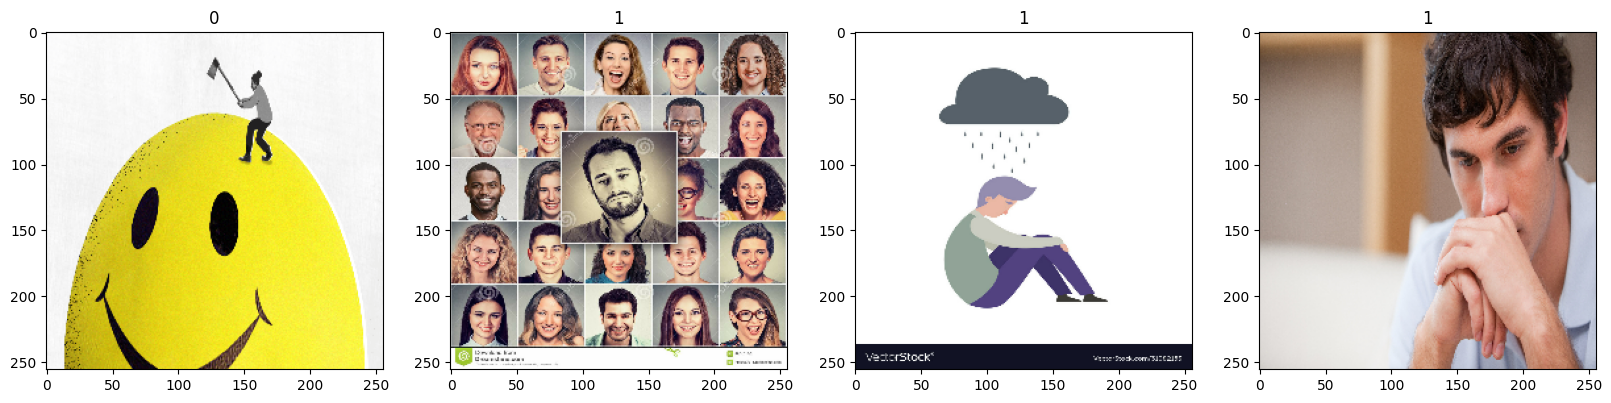

In [ ]:
from keras.src.utils.image_dataset import image_dataset_from_directory
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Scale data


In [ ]:
data=data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

In [ ]:
len(data)

5

split data

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [ ]:
train_size

3

In [ ]:
val_size

1

In [ ]:
test_size

1

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

train

In [ ]:
logdirs='\content\logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdirs)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 17s 2s/step - loss: 1.1394 - accuracy: 0.5104 - val_loss: 0.8049 - val_accuracy: 0.5312
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.7650 - accuracy: 0.5000 - val_loss: 0.6483 - val_accuracy: 0.7188
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6376 - accuracy: 0.6354 - val_loss: 0.5526 - val_accuracy: 0.7812
Epoch 4/20
3/3 [==============================] - 7s 3s/step - loss: 0.5618 - accuracy: 0.6771 - val_loss: 0.5417 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.5903 - accuracy: 0.7083 - val_loss: 0.4193 - val_accuracy: 0.8125
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.5355 - accuracy: 0.7188 - val_loss: 0.4972 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 6s 1s/step - loss: 0.4981 - accuracy: 0.7708 - val_loss: 0.4739 - val_accuracy: 0.7812
Epoch 8/20
3/3 [========================

 Plot Performance





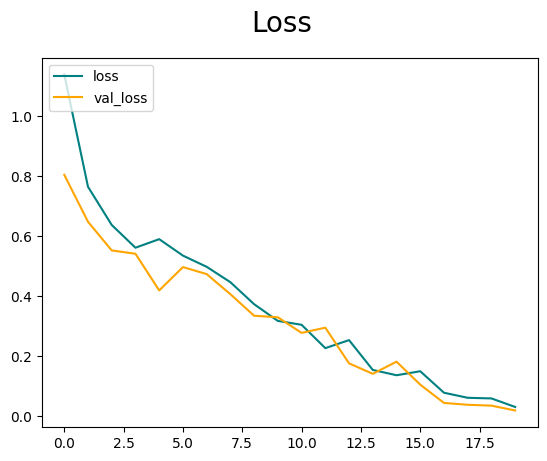

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

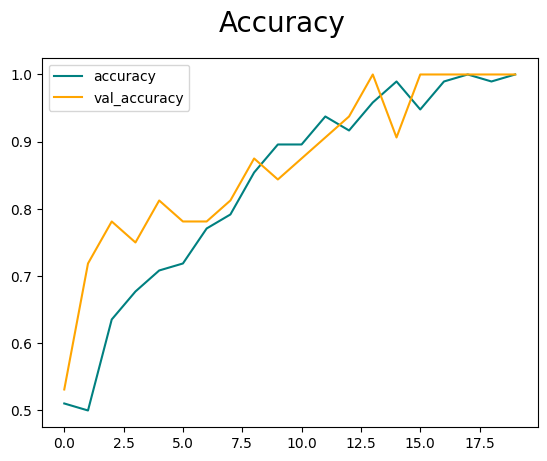

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 366ms/step


In [ ]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


Test

In [ ]:
file_path_in_drive = '/content/gdrive/My Drive/material/sad_test.png'
destination_folder_path = '.'


# Copy the file to the current working directory in Colab
shutil.copy(file_path_in_drive, destination_folder_path)

'./sad_test.png'

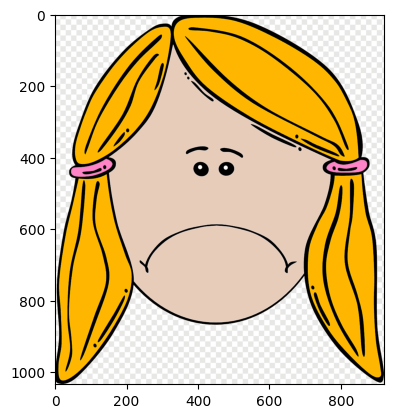

In [ ]:
img = cv2.imread('/content/sad_test.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

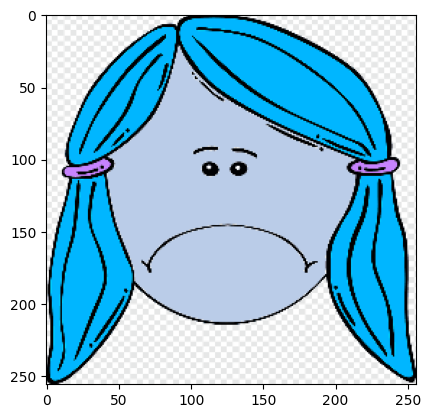

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 128ms/step


In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


Saving the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:

model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 149ms/step
Predicted class is Sad
